# Classificação binária

Temos um banco de dados com algumas informações sobre automóveis de uma plataforma de venda. Precisamos saber se, a partir dessas características o automóvel será vendido ou não.

## Tratando os dados

In [2]:
# bibliotecas
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [3]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
# renomeando as colunas
a_renomear = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

dados.rename(columns = a_renomear, inplace = True)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
# trocando as categorias do vendido para binário
a_trocar = {
    'no': 0,
    'yes': 1
}

dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [6]:
# calculando a idade do modelo
ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [7]:
# calculando km por ano
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


## Modelo de classificação linear

In [8]:
# selecionando os dados para o modelo
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [9]:
seed = 5
np.random.seed(seed)

# separando os dados de treino e de teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, stratify=y)
print('Treinaremos com %d observações e testaremos com %d.' % (len(treino_x), len(teste_x)))

# ajustando o modelo
modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%.' % acuracia)

Treinaremos com 7500 observações e testaremos com 2500.
A acurácia foi 46.88%.


c:\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Validando com um modelo de base (*dummy*)

In [10]:
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes_dummy = dummy.predict(teste_x)

acuracia_dummy = accuracy_score(teste_y, previsoes_dummy) * 100
print('A acurácia do modelo dummy proporcional foi %.2f%%.' % acuracia_dummy)

A acurácia do modelo dummy proporcional foi 58.00%.


In [11]:
dummy_most_frequent = DummyClassifier(strategy = 'most_frequent')
dummy_most_frequent.fit(treino_x, treino_y)
previsoes_dummy = dummy_most_frequent.predict(teste_x)

acuracia_dummy = accuracy_score(teste_y, previsoes_dummy) * 100
print('A acurácia do modelo dummy mais frequente foi %.2f%%.' % acuracia_dummy)

A acurácia do modelo dummy mais frequente foi 58.00%.


Vemos então, que o modelo linear pode ser pior que os estimadores simples. Então vamos testar com o modelo não-linear.

## Modelo de classificação não-linear

In [12]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,  stratify=y)
print('Treinaremos com %d observações e testaremos com %d.' % (len(treino_x), len(teste_x)))

# padronizando as variáveis
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

# ajustando o modelo
modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)

# avaliando o modelo
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 7500 observações e testaremos com 2500.
A acurácia foi 76.68%


Já percebemos uma melhora na acurácia do modelo, mas como o modelo está decidindo? Para isso, vamos usar um modelo de Árvore de Decisão

## Modelo de árvore de decisão

In [13]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,  stratify=y)
print('Treinaremos com %d observações e testaremos com %d.' % (len(treino_x), len(teste_x)))

# ajustando o modelo
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(treino_x, treino_y)

# avaliando o modelo
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 7500 observações e testaremos com 2500.
A acurácia foi 79.36%


Mesmo que o modelo tenha um resultado pior, ele pode ser interessante para poder entender o seu processo de decisão.

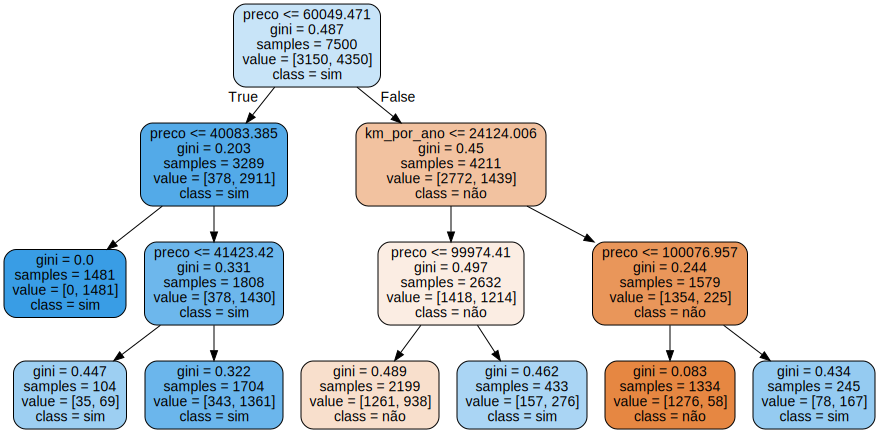

In [14]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, filled = True, rounded=True, feature_names=features, class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico

## Modelo com *Cross Validation*

In [17]:
from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = 3)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'Acurácia com cross validation 3 entre [{(media - 2* desvio_padrao)*100:.2f},{(media + 2* desvio_padrao)*100:.2f}]')

Acurácia com cross validation 3 entre [74.99,76.57]


Mesmo alterando os valores do SEED, ainda obtenho o mesmo intervalo. No entanto, como determinamos o limite do *cross validation*? Testando alguns valores, vemos que o intervalo pode ter uma variabilidade. No próprio `scikit learn` há algumas citações sugerindo que o *cross validation* fique entre 5 e 10.  

In [18]:
SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = 10)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'Acurácia com cross validation 10 entre [{(media - 2* desvio_padrao)*100:.2f},{(media + 2* desvio_padrao)*100:.2f}]')

Acurácia com cross validation 10 entre [74.24,77.32]


In [19]:
SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = 5)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print(f'Acurácia com cross validation 5 entre [{(media - 2* desvio_padrao)*100:.2f},{(media + 2* desvio_padrao)*100:.2f}]')

Acurácia com cross validation 5 entre [75.21,76.35]


### Aleatoriedade no *cross validate*

In [24]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print(f'Média da acurácia = {media*100:.2f}%')
    print(f'Acurácia com cross validation entre [{(media - 2* desvio_padrao)*100:.2f},{(media + 2* desvio_padrao)*100:.2f}]%')

In [25]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
imprime_resultados(results)

Média da acurácia = 75.78%
Acurácia com cross validation entre [74.37,77.19]%


In [26]:
SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True) # 'bagunça' os dados
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
imprime_resultados(results)

Média da acurácia = 75.76%
Acurácia com cross validation entre [73.26,78.26]%


No entando, aplicar o `KFold` pode separar os dados sem considerar o desbalanceamento. Por isso vamos usar o `StratifiedKFold`.

In [27]:
from sklearn.model_selection import StratifiedKFold

SEED = 301
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 10, shuffle = True) # 'bagunça' os dados
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
imprime_resultados(results)

Média da acurácia = 75.78%
Acurácia com cross validation entre [74.42,77.14]%


**Gerando um coluna com valores aleatórios**

Para exemplificar um modelo com agrupamentos de dados, vamos gerar uma coluna com os modelos dos carros

In [28]:
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size = len(dados.idade_do_modelo))
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,0,21801,2000,30941.02,1,22,35085.22134,24
1,1,7843,1998,40557.96,1,24,12622.05362,30
2,2,7109,2006,89627.50,0,16,11440.79806,20
3,3,26823,2015,95276.14,0,7,43167.32682,12
4,4,7935,2014,117384.68,1,8,12770.11290,11


### Cross validate agrupado

In [33]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10) 
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False, groups = dados.modelo) # incluo a variável com grupos aqui
imprime_resultados(results)

Média da acurácia = 75.80%
Acurácia com cross validation entre [72.00,79.60]%


## Cross validation com Padronização

In [41]:
scaler = StandardScaler()
scaler.fit(treino_x)
treino_x_padronizado = scaler.transform(treino_x)
teste_x_padronizado = scaler.transform(teste_x)

np.random.seed(SEED)
modelo = SVC()
modelo.fit(treino_x_padronizado, treino_y)
previsoes_y = modelo.predict(teste_x_padronizado)

acuracia = accuracy_score(teste_y, previsoes_y) 
print(f'A acurácia foi {acuracia*100:.2f}%')

A acurácia foi 77.16%


In [42]:
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformação', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits = 10) 
results = cross_validate(pipeline, x, y, cv = cv, return_train_score=False, groups = dados.modelo) 
imprime_resultados(results)

Média da acurácia = 76.55%
Acurácia com cross validation entre [73.22,79.88]%


In [43]:
SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = DecisionTreeClassifier(max_depth=2)

pipeline = Pipeline([('transformação', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits = 10) 
results = cross_validate(pipeline, x, y, cv = cv, return_train_score=False, groups = dados.modelo) 
imprime_resultados(results)

Média da acurácia = 75.80%
Acurácia com cross validation entre [72.00,79.60]%
